## CPMSC 448 Homework 2
### Problem 4

#### Name: Max Guthrie
#### PSU id: 974486477


In this problem will use the Pima Indians Diabetes dataset from the UCI repository to experiment with the $k$-NN algorithm and find the optimal value for the number of neighbors  $k$. You do not need to implement the algorithm and encouraged to use the implementation in \texttt{scikit-learn}.


### a) 
Download the provided `Pima.csv` data file and load it using `pandas`. As a sanity check, make sure  there are 768 rows of data (potential diabetes patients) and 9 columns (8 input features including  `Pregnancies`, `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`, `DiabetesPedigreeFunction`, `Age`, and 1 target output). Note that the data file has no header and you might want to explicitly create the header. The last value in each row contains the target label for that row, and the remaining values are the features. Report the statics of each feature (min, max, average) and the histogram of the labels (target outputs).
    

In [98]:
import pandas
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
%config InteractiveShell.ast_node_interactivity = 'all'

data = pandas.read_csv("Pima.csv")

descr = data.describe()

descr

,pregnancies,glucose,bloodPressure,skinThickness,insulin,BMI,diabetesPedigreeFunction,age,target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


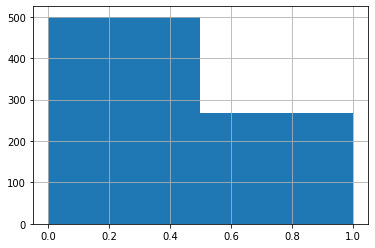

In [99]:
labels = data['target']
hist = labels.hist(bins=2)

### b) 
Split the data into training and test data with 80\% training and 20\% test data sizes. 

Use 5-fold cross-validation on training data to decide the best number of neighbours $k$. To this end, you can use the built in functionality in  `scikit-learn` such as `cross_val_score`. For $k=1,2,3,\ldots, 15$ compute the 5-fold cross validation error and plot the results  (with values of $k$ on the $x$-axis and accuracy on the $y$-axis). Include the plot in your report and justify your decision for picking a particular number of neighbors $k$.

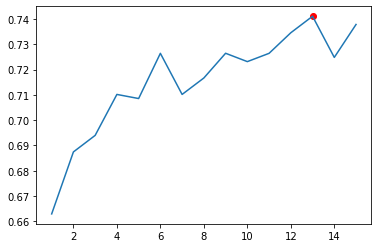

In [100]:
X = data.iloc[:, :8]
y = data.iloc[:, 8]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

knn = KNeighborsClassifier(n_neighbors=0)

kvals = range(1, 16)
accs = []

#looping through and finding average accuracy for each k value
for k in kvals:
    knn.n_neighbors = k
    acc = cross_val_score(knn, X_train, y_train, cv=5)
    mean_acc = sum(acc)/5
    accs.append(mean_acc)
    
#finding the k value with the maximum accuracy
K = accs.index(max(accs)) + 1

#plotting k vs accuracy
plt.plot(kvals, accs)

#plot the point with the highest accuracy
plt.scatter(K, accs[K-1], color='red')

plt.show()

In [101]:
print(f'Chosen k: {K} \n This k value was found to produce the highest average accuracy.')

Chosen k: 13 
 This k value was found to produce the highest average accuracy.


### c ) 
Evaluate the $k$-NN algorithm on test data with the optimal number of neighbours you obtained in previous step and report the test error.

In [102]:
knn.n_neighbors = K
knn.fit(X_train, y_train)

yhat = knn.predict(X_test)
test_acc = knn.score(X_test, y_test)

print(f'Accuracy: {test_acc}')

KNeighborsClassifier(n_neighbors=13)

Accuracy: 0.7597402597402597


### d) 
Process the input data  by subtracting the mean (a.k.a. centralization) and dividing by the standard deviation (a.k.a. standardization) over each dimension (feature),  repeat the previous part and report the accuracy. Do centralization and standardization affect the accuracy? Why?

In [103]:
from copy import deepcopy
features = data.columns[:-1]
std_norm_data = deepcopy(data)
for feature in features:
    f_mean, f_std = descr[feature]['mean'], descr[feature]['std']
    std_norm_data[feature] = data[feature].sub(f_mean).div(f_std)
    
std_norm_data.head()

sn_X = std_norm_data.iloc[:, :8]
sn_X_train, sn_X_test, y_train, y_test = train_test_split(sn_X, y, test_size=0.2)

,pregnancies,glucose,bloodPressure,skinThickness,insulin,BMI,diabetesPedigreeFunction,age,target
0,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067,1
1,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548,0
2,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515,1
3,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.920163,-1.040871,0
4,-1.141108,0.503727,-1.503707,0.906679,0.765337,1.408828,5.481337,-0.020483,1


In [106]:
new_knn = KNeighborsClassifier(n_neighbors=K)
new_knn.fit(sn_X_train, y_train)
new_acc = new_knn.score(sn_X_test, y_test)
print(f"Accuracy with centeralization and standardization: {new_acc}")

KNeighborsClassifier(n_neighbors=13)

Accuracy with centeralization and standardization: 0.8051948051948052


In [105]:
print("Yes, centralization and standardization do affect the accuracy. It increases the accuracy because not standardizing \n data will unintentionally give priorities to features that have wider value ranges because distances on these feature \n dimensions will be greater. Standardizing removes this bias and allows the features to be judged on the same distribution.")

Yes, centralization and standardization do affect the accuracy. It increases the accuracy because not standardizing 
 data will unintentionally give priorities to features that have wider value ranges because distances on these feature 
 dimensions will be greater. Standardizing removes this bias and allows the features to be judged on the same distribution.
